# Pi, but Extrapolating
In a previous notebook, I used the Ramanujan Sequence to determine the first 7000 digits of $\pi$. Now I want to use that to extrapolate  some data *(yes extrapolate, I'm probably making assumptions that cannot be made but oh well)*

# Frequency of the digits
In the ideal scenario, all of them are infinite, but in this situation, we are using a finite, $7000$ digit set of digits, so we can look for some patterns.

# Hypothesis
The frequency of all digits will be extremely similar, due to their randomness. The graph will be symmetric, with a mean ($\mu$) close to $4.5$ and a standard deviation ($\sigma$) approximately $2.87$.

For this project, the 7000 digits will be considered as the true population to reduce complexity and allow for more sampling later on. Ideally the true population would have infinite values.

In [1]:
# from https://github.com/CoolPerson879/TensorFlow-Practice/blob/main/Pi.ipynb
from decimal import Decimal, getcontext

# Set precision higher than needed
getcontext().prec = 7100

def decimal_factorial(n):
    result = Decimal(1)
    for i in range(1, n + 1):
        result *= i
    return result

def s(tol=Decimal("1e-7050")):
    total = Decimal(0)
    n = 0
    k = (Decimal(2).sqrt() * 2) / Decimal(9801)

    while True:
        numerator = decimal_factorial(4 * n) * (1103 + 26390 * n)
        denominator = (decimal_factorial(n) ** 4) * (Decimal(396) ** (4 * n))
        term = numerator / denominator
        total += term

        if abs(term) < tol:
            break

        n += 1

    return 1 / (k * total)

pi = s()

# Truncate to exactly 7000 digits after decimal
pi_7000 = pi.quantize(Decimal(1) / (Decimal(10) ** 7000))
print(pi_7000)

3.14159265358979323846264338327950288419716939937510582097494459230781640628620899862803482534211706798214808651328230664709384460955058223172535940812848111745028410270193852110555964462294895493038196442881097566593344612847564823378678316527120190914564856692346034861045432664821339360726024914127372458700660631558817488152092096282925409171536436789259036001133053054882046652138414695194151160943305727036575959195309218611738193261179310511854807446237996274956735188575272489122793818301194912983367336244065664308602139494639522473719070217986094370277053921717629317675238467481846766940513200056812714526356082778577134275778960917363717872146844090122495343014654958537105079227968925892354201995611212902196086403441815981362977477130996051870721134999999837297804995105973173281609631859502445945534690830264252230825334468503526193118817101000313783875288658753320838142061717766914730359825349042875546873115956286388235378759375195778185778053217122680661300192787661119590921642019

In [2]:
# put the values in an array to look for patterns
pi_str = format(pi_7000, 'f')

decimal_digits = pi_str.split('.')[1]

digits_array = [int(d) for d in decimal_digits]

print(len(digits_array))
print(digits_array[:20])


7000
[1, 4, 1, 5, 9, 2, 6, 5, 3, 5, 8, 9, 7, 9, 3, 2, 3, 8, 4, 6]


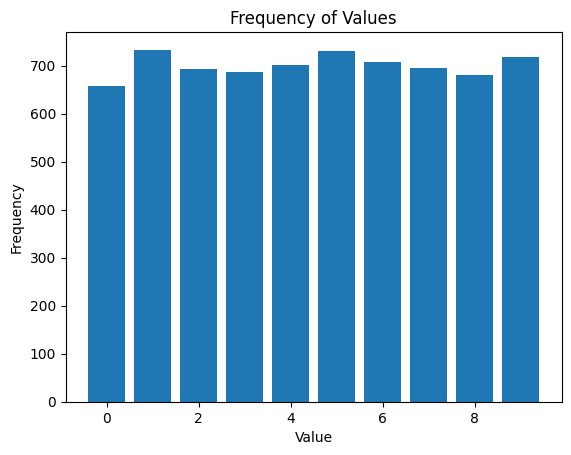

In [3]:
import matplotlib.pyplot as plt
import numpy as np

values, counts = np.unique(digits_array, return_counts=True)

plt.bar(values, counts)
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.title("Frequency of Values")

plt.show()


# Hypothesis was about correct, and showed around the variability as initilally expected.

As there is no outliers, standard deviation and mean should be preferred over median and interquartile range.

Lets find a measure of center and variability for to learn more.
For now, we will assume that the 7000 digits is the true **population**, and not just a sample (this allows us to work with smaller samples out of this 7000).

*I know there are faster and mroe efficient ways of doing the below code, but I want to do it like this*

In [8]:
import math;
# Mean
total = 0
for i in digits_array:
  total += i

mean = total / len(digits_array) # 7000
print(mean)

# Standard Deviation
stsum = 0
for j in digits_array:
  stsum += (j - mean) ** 2
stdev = math.sqrt(stsum / len(digits_array))
print(stdev)

4.520142857142857
2.8612474766173244


## Generate Multiple Random Samples

Generate 1000 random samples with each sample containing 30 digits.

$1000\geq 30$ so normality can be assumed by Central Limit Theorem.


In [18]:
import random

num_samples = 1000
sample_size = 30

random_samples = []

max_start = len(digits_array) - sample_size

for _ in range(num_samples):
    start_idx = random.randint(0, max_start)
    sample = digits_array[start_idx:start_idx + sample_size]
    random_samples.append(sample)

print(f"{len(random_samples)} samples.")
print(f"1st sample: {random_samples[0]}")


1000 samples.
1st sample: [6, 7, 9, 5, 4, 5, 7, 1, 6, 3, 7, 7, 5, 2, 5, 4, 2, 0, 2, 1, 1, 4, 9, 5, 5, 7, 6, 1, 5, 8]


In [19]:
sample_means = []
sample_stds = []

# Delete the 'sum' variable if it was previously overwritten
# This ensures the built-in sum() function is used.
if 'sum' in globals() and not callable(sum):
    del sum

for sample in random_samples:
    sample_mean = sum(sample) / len(sample)
    sample_means.append(sample_mean)

    # Calculate sample standard deviation (unbiased estimator)
    # Using Bessel's correction (n-1) for sample standard deviation
    if len(sample) > 1:
        sample_variance = sum([(x - sample_mean) ** 2 for x in sample]) / (len(sample) - 1)
        sample_std = math.sqrt(sample_variance)
    else:
        sample_std = 0.0 # Standard deviation is 0 for a single element sample
    sample_stds.append(sample_std)

print(f"calculated means for {len(sample_means)} samples.")
print(f"first 5 sample means: {sample_means[:5]}")
print(f"calculated standard deviations for {len(sample_stds)} samples.")
print(f"first 5 sample standard deviations: {sample_stds[:5]}")

calculated means for 1000 samples.
first 5 sample means: [4.633333333333334, 4.2, 4.7, 5.366666666666666, 5.1]
calculated standard deviations for 1000 samples.
first 5 sample standard deviations: [2.511811179666746, 3.397768030076052, 2.8057822069974443, 2.5526636977915813, 2.9635719361422046]


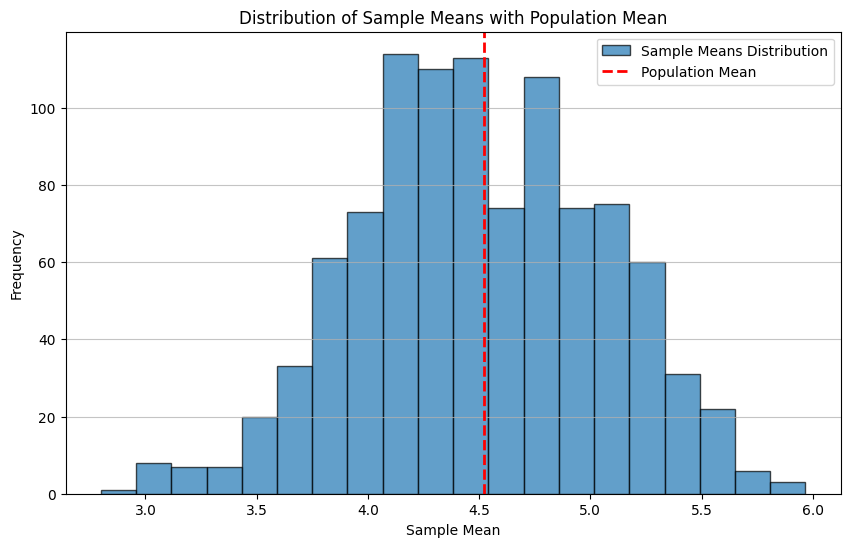

In [20]:
plt.figure(figsize=(10, 6))
plt.hist(sample_means, bins=20, edgecolor='black', alpha=0.7, label='Sample Means Distribution')
plt.axvline(mean, color='red', linestyle='dashed', linewidth=2, label='Population Mean')
plt.xlabel('Sample Mean')
plt.ylabel('Frequency')
plt.title('Distribution of Sample Means with Population Mean')
plt.legend()
plt.grid(axis='y', alpha=0.75)
plt.show()

## Plot Distribution of Sample Standard Deviations

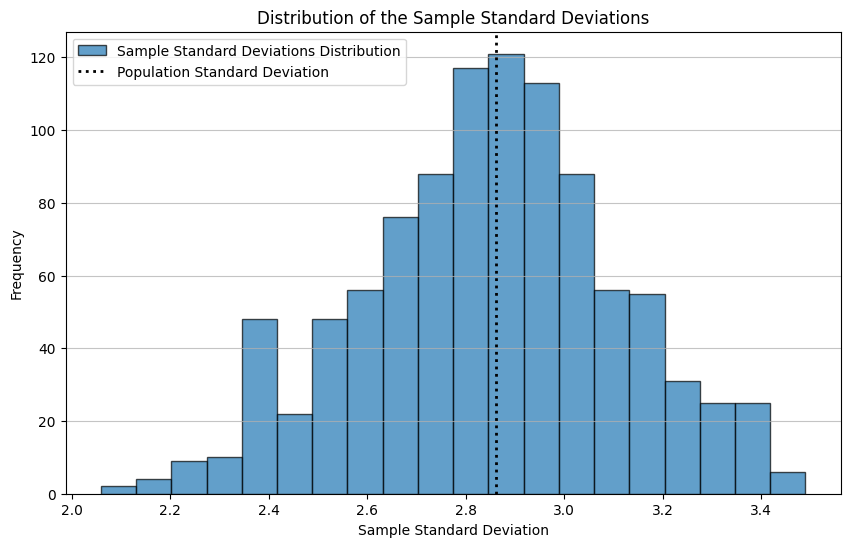

In [21]:
plt.figure(figsize=(10, 6))
plt.hist(sample_stds, bins=20, edgecolor='black', alpha=0.7, label='Sample Standard Deviations Distribution')
plt.axvline(stdev, color='black', linestyle='dotted', linewidth=2, label='Population Standard Deviation')
plt.xlabel('Sample Standard Deviation')
plt.ylabel('Frequency')
plt.title('Distribution of the Sample Standard Deviations')
plt.legend()
plt.grid(axis='y', alpha=0.75)
plt.show()

## The sampling distribution of the standard deviations looks approximately normal, however has a slight left shift

The region $[2.36,2.4)$ was also an outlier in the pattern.

# Tensorflow Time
Use TensorFlow and the sampling data above to attempt to predict the next data

In [24]:
# build a tensorflow model to predict a digit of pi given the digits before it

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import numpy as np

# preprocess data

SEQ_LENGTH = 30  # window size (matches sample size and CLT threshold if that changes anythinv)

X = []
y = []

for i in range(len(digits_array) - SEQ_LENGTH):
    X.append(digits_array[i:i + SEQ_LENGTH])
    y.append(digits_array[i + SEQ_LENGTH])

X = np.array(X)
y = np.array(y)

y = to_categorical(y, num_classes=10)

X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.2, random_state=42, shuffle=True
)

print("Training samples:", X_train.shape)
print("Validation samples:", X_val.shape)

# build and compile the model

model = Sequential([
    Embedding(input_dim=10, output_dim=16, input_length=SEQ_LENGTH),
    LSTM(64, return_sequences=False),
    Dense(32, activation='relu'),
    Dense(10, activation='softmax')
])

model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

model.summary()


history = model.fit(
    X_train,
    y_train,
    epochs=20,
    batch_size=64,
    validation_data=(X_val, y_val)
)


def predict_next_digit(model, seed_sequence):
    seed_sequence = np.array(seed_sequence).reshape(1, SEQ_LENGTH)
    probabilities = model.predict(seed_sequence, verbose=0)[0]
    predicted_digit = np.argmax(probabilities)
    return predicted_digit, probabilities

seed = digits_array[-SEQ_LENGTH:]
prediction, probs = predict_next_digit(model, seed)

print("Seed sequence:", seed)
print("Predicted next digit:", prediction)
print("Probabilities:", probs)

Training samples: (5576, 30)
Validation samples: (1394, 30)


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
88/88 ━━━━━━━━━━━━━━━━━━━━ 7s 46ms/step - accuracy: 0.1020 - loss: 2.3027 - val_accuracy: 0.1033 - val_loss: 2.3037
Epoch 2/20
88/88 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - accuracy: 0.1110 - loss: 2.3011 - val_accuracy: 0.1062 - val_loss: 2.3031
Epoch 3/20
88/88 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - accuracy: 0.1011 - loss: 2.3026 - val_accuracy: 0.0990 - val_loss: 2.3036
Epoch 4/20
88/88 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - accuracy: 0.1152 - loss: 2.3015 - val_accuracy: 0.0897 - val_loss: 2.3045
Epoch 5/20
88/88 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - accuracy: 0.1165 - loss: 2.2996 - val_accuracy: 0.0968 - val_loss: 2.3062
Epoch 6/20
88/88 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - accuracy: 0.1153 - loss: 2.2991 - val_accuracy: 0.1098 - val_loss: 2.3083
Epoch 7/20
88/88 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - accuracy: 0.1224 - loss: 2.2965 - val_accuracy: 0.0976 - val_loss: 2.3076
Epoch 8/20
88/88 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - accuracy: 0.1282 - loss: 2.2958 - val_accuracy: 0.0997 - v

In [32]:
# lets check if thats correct
def check_next_digit(data, seed, predicted_next):
    seed_len = len(seed)
    matches = []

    for i in range(len(data) - seed_len):
        if data[i:i + seed_len] == seed:
            next_index = i + seed_len
            if next_index < len(data):
                actual_next = data[next_index]
                matches.append((i, actual_next, actual_next == predicted_next))

    return matches
check_next_digit(digits_array, seed, prediction)

[2]

# It worked! Not really
It worked the first time, but die to the extremely low accuracy, the model is basically guessing. More fitting, preprocessing and training will be needed to improve the model. Maybe calculating digits of $\pi$ using machine learning isn't the best ideaa...